# Scikit-Learn Notebook

### Overview of scikit-learn python library

What is scikit-learn? Well based on scikit-learn.org page, scikit-learn is a "simple and effiecient tools for predictive data analysis".  

###Recognizing hand-writteb digits with scikit-learn classification algorithm

In [76]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

#Load digit is a sample dataset, now stored in digi variable
digi = datasets.load_digits()
print("Image Data Shape" , digi.data.shape)

Image Data Shape (1797, 64)


Image I am going to identify
[[[163 149 138]
  [161 147 136]
  [162 148 137]
  ...
  [ 23  14  15]
  [ 23  14  15]
  [ 24  15  16]]

 [[158 144 133]
  [157 143 132]
  [160 146 135]
  ...
  [ 23  14  15]
  [ 22  13  14]
  [ 22  13  14]]

 [[158 144 133]
  [158 144 133]
  [160 146 135]
  ...
  [ 23  14  15]
  [ 24  15  16]
  [ 24  15  16]]

 ...

 [[ 90  87  82]
  [ 89  86  81]
  [ 88  85  80]
  ...
  [ 73  64  65]
  [ 73  64  65]
  [ 74  65  66]]

 [[ 88  85  80]
  [ 87  84  79]
  [ 86  83  78]
  ...
  [ 71  62  63]
  [ 71  62  63]
  [ 71  62  63]]

 [[ 87  84  79]
  [ 86  83  78]
  [ 85  82  77]
  ...
  [ 73  64  65]
  [ 73  64  65]
  [ 74  65  66]]]


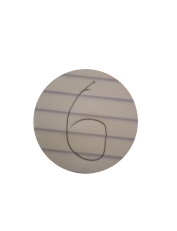

In [48]:
#Importing and viewing my image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cbook as cbook


with cbook.get_sample_data('handWritten6.jpg') as image_file:
    image = plt.imread(image_file)

fig, ax = plt.subplots()
im = ax.imshow(image)

patch = patches.Circle((1500, 2200), radius=1000, transform=ax.transData)
im.set_clip_path(patch)

ax.axis('off')
print(image)

plt.show()

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
Here X
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  2. ... 14.  0.  0.]
 [ 0.  1. 12. ...  0.  0.  0.]
 [ 0.  0.  0. ...  3.  0.  0.]]
Here y
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4
 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2
 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 3 1 3 9 1
 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 5 4 8 8 4 9 0 8 9 8 0 1 2
 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9
 8

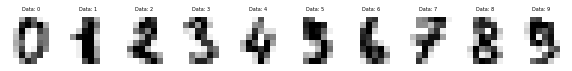

In [65]:
import numpy as np 
import matplotlib.pyplot as plt

# flatten the images
n_samples = len(digi.images)
data = digi.images.reshape((n_samples, -1))
print(data)
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digi.target, test_size=0.5, shuffle=False)

print("Here X")
print(X_train)



print("Here y")
print(y_train)


# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)


_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes, digi.images, digi.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Data: %i' % label,  fontsize = 5)

In [57]:
import numpy as np 
# flatten the images
n_samples = len(image)
data = image.reshape((n_samples, -1))
print(data)


#My target is 6
target = [6]

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)


_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

[[163 149 138 ...  24  15  16]
 [158 144 133 ...  22  13  14]
 [158 144 133 ...  24  15  16]
 ...
 [ 90  87  82 ...  74  65  66]
 [ 88  85  80 ...  71  62  63]
 [ 87  84  79 ...  74  65  66]]


ValueError: Found input variables with inconsistent numbers of samples: [4160, 1]

In [37]:
# Split data into 50% train and 50% tes subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, [1], test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)


_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

ValueError: Found input variables with inconsistent numbers of samples: [4160, 1]

1. Algorithm 

2. Algorithm 2

3. Algorithm 3